## Lista1

In [80]:
#zad1 
import pandas as pd
import matplotlib.pyplot as plt, numpy as np

dane = pd.read_csv(r"/Users/zuzia/Desktop/dane_1.txt", delim_whitespace=True, header=None)
objasniajaca = dane[0]
objasniana = dane[1]

In [86]:
def polymodel(stopień,x,y):
    xs=np.linspace(min(x), max(x),500)
    wspolczynniki= np.polyfit(objasniajaca,objasniana,stopień)
    poly= np.poly1d(wspolczynniki)
    Y_dopasowanie= poly(xs)

    wzor_wielomianu = " + ".join([f"{coef:.2f}x$^{i}$" if i > 0 else f"{coef:.2f}" 
                                  for i, coef in enumerate(reversed(poly.coefficients))])
    
    plt.figure(figsize=(10, 5))
    plt.plot(xs, Y_dopasowanie, label=f'{wzor_wielomianu}', color="plum")
    plt.scatter(objasniajaca,objasniana, label="Dane", color="brown")
    plt.title(f'Regresja wielomianu stopnia {stopień}')
    plt.legend()
    plt.show()


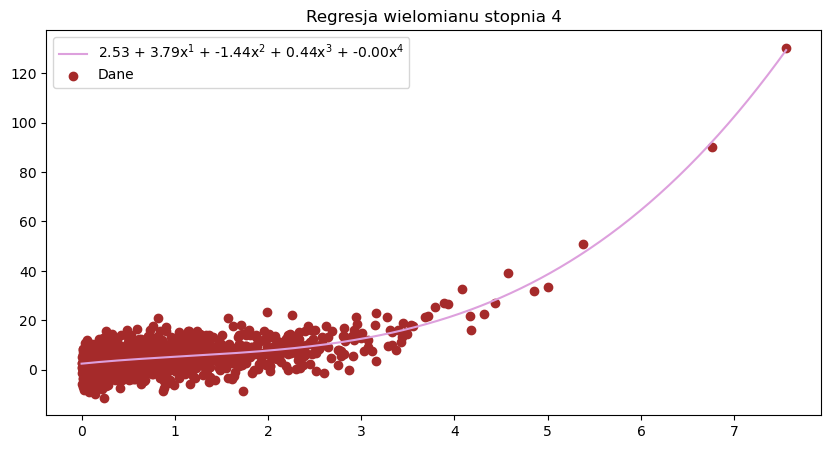

In [88]:
polymodel(4,objasniajaca,objasniana)

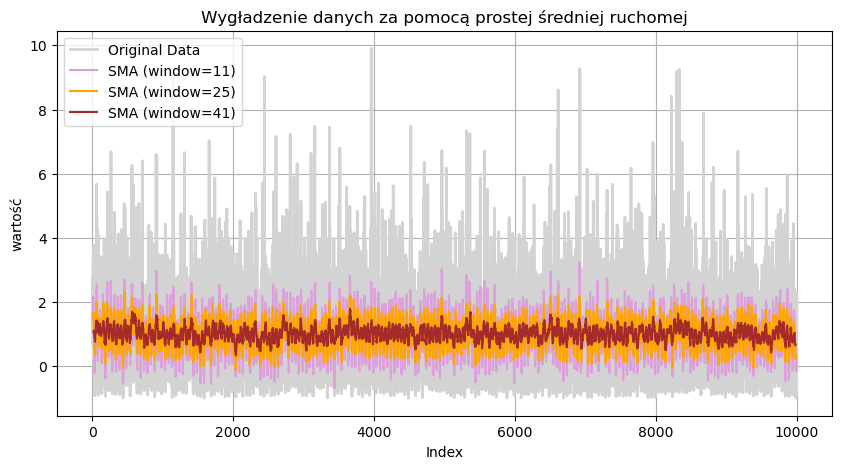

In [33]:
#zad2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

dane2 = pd.read_csv(r"/Users/zuzia/Desktop/dane_2.txt", delim_whitespace=True, header=None)


p = 20  
sma_11 = moving_average(dane2, 11)
sma_25 = moving_average(dane2, 25)
sma_2p1 = moving_average(dane2, 2 * p + 1)


plt.figure(figsize=(10, 5))

plt.plot(dane2, label='Original Data', color='lightgray', linewidth=2)
plt.plot(sma_11, label='SMA (window=11)', color='plum')
plt.plot(sma_25, label='SMA (window=25)', color='orange')
plt.plot(sma_2p1, label=f'SMA (window={2 * p + 1})', color='brown')
plt.title('Wygładzenie danych za pomocą prostej średniej ruchomej')
plt.xlabel('Index')
plt.ylabel('wartość')
plt.legend()
plt.grid(True)
plt.show()


In [191]:
import requests
from io import StringIO

url2 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad2_lista1.txt"
response = requests.get(url2, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df2 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['values'])

# Kolumna z danymi
values2 = df2['values']

c:\Users\zuzia\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prac.im.pwr.edu.pl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [192]:
import requests
from io import StringIO

url2 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad3_lista1.txt"
response = requests.get(url2, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df2 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['values'])

# Kolumna z danymi
values3 = df2['values']

c:\Users\zuzia\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prac.im.pwr.edu.pl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


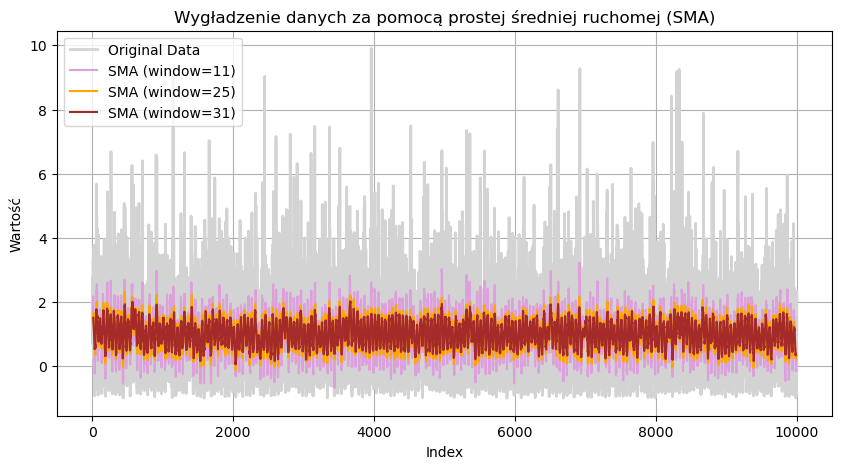

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def prosta_śr_ruchoma(data, p):
    window_size= 2*p+1

    śr_ruchoma = [np.nan] * len(data)  

    for i in range(window_size - 1, len(data)):
        window = data[i - window_size + 1:i + 1]  
        śr_ruchoma[i] = np.mean(window)  
    
    return pd.Series(śr_ruchoma)

def pr_sr_ruchoma2(data, p):
    ma_values = []
    n = len(data)
    window_size = 2 * p + 1
    for t in range(p, n - p):
        window_sum = 0

        for j in range(-p, p + 1):
            window_sum += data[t + j]

        ma_value = window_sum / window_size
        ma_values.append(ma_value)

    ma_values = [None] * p + ma_values + [None] * p
    return pd.Series(ma_values)


sma_11 = pr_sr_ruchoma2(values2, 5)
sma_25 = pr_sr_ruchoma2(values2, 12)
sma_31 = pr_sr_ruchoma2(values2, 15)


plt.figure(figsize=(10, 5))
plt.plot(dane2, label='Original Data', color='lightgray', linewidth=2)
plt.plot(sma_11, label='SMA (window=11)', color='plum')
plt.plot(sma_25, label='SMA (window=25)', color='orange')
plt.plot(sma_31, label='SMA (window=31)', color='brown')
plt.title('Wygładzenie danych za pomocą prostej średniej ruchomej (SMA)')
plt.xlabel('Index')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()


In [120]:
dane33 = pd.read_csv(r"/Users/zuzia/Desktop/dane_3.txt", delim_whitespace=True, header=None)

5.226906171237193 19.966464658199964


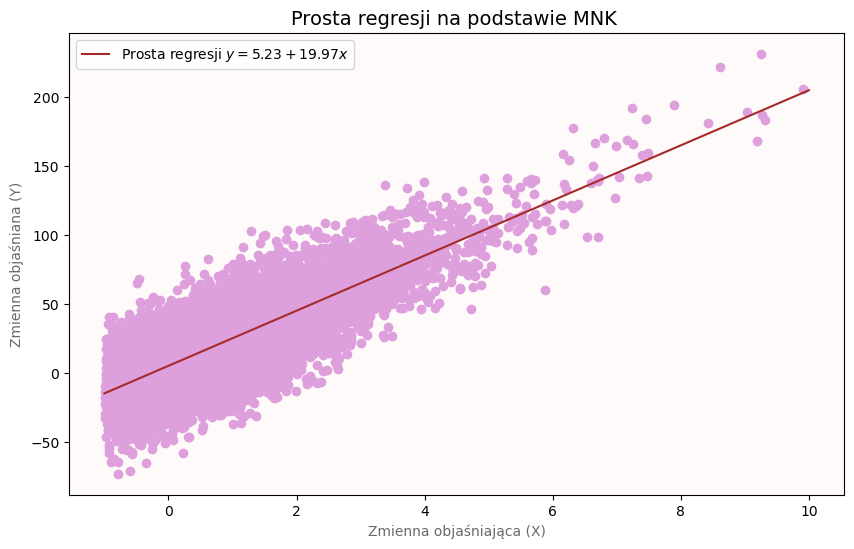

In [150]:
#zad3 
import requests
from io import StringIO

dane2 = np.loadtxt(r'/Users/zuzia/Desktop/dane_2.txt')
dane3 = np.loadtxt(r'/Users/zuzia/Desktop/dane_3.txt')

def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

b0, b1 = prosta_regresji(dane2, dane3)
print(b0,b1)
xs = np.linspace(-1,10,1000)



plt.figure(figsize=(10, 6))
plt.scatter(dane2, dane3, color="plum")
plt.plot(xs, xs * b1 + b0, color="brown",  label=fr"Prosta regresji $y = {b0:.2f} + {b1:.2f}x$")
plt.xlabel("Zmienna objaśniająca (X)", fontsize=10, color="dimgray")
plt.ylabel("Zmienna objaśniana (Y)", fontsize=10, color="dimgray")
plt.title("Prosta regresji na podstawie MNK ", fontsize=14)
plt.legend(fontsize=10, loc="upper left")
plt.gca().set_facecolor('snow')
plt.show()

5.364406126766976 19.82621096175363


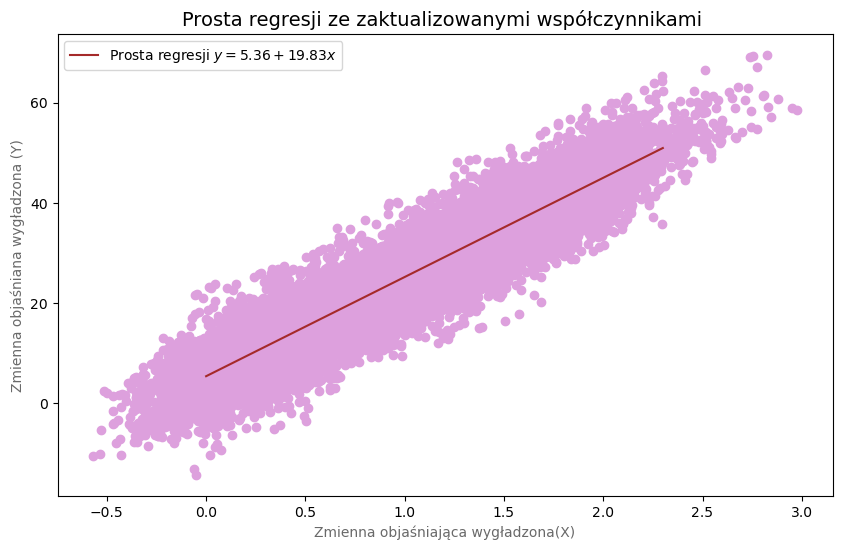

In [237]:
dane2_wygladzone, dane3_wygladzone= pr_sr_ruchoma2(values2, 6), pr_sr_ruchoma2(values3, 6)
b01, b11 = prosta_regresji(dane2_wygladzone, dane3_wygladzone)
print(b01,b11)
xs2 = np.linspace(0,2.3,1000)

plt.figure(figsize=(10, 6))
plt.scatter(dane2_wygladzone, dane3_wygladzone, color="plum")
plt.plot(xs2, b11*xs2 + b01, color="brown", label=fr"Prosta regresji $y = {b01:.2f} + {b11:.2f}x$")
plt.title("Prosta regresji ze zaktualizowanymi współczynnikami ", fontsize=14)
plt.xlabel("Zmienna objaśniająca wygładzona(X)", fontsize=10, color="dimgray")
plt.ylabel("Zmienna objaśniana wygładzona (Y)", fontsize=10, color="dimgray")
plt.legend(fontsize=10, loc="upper left")
plt.show()

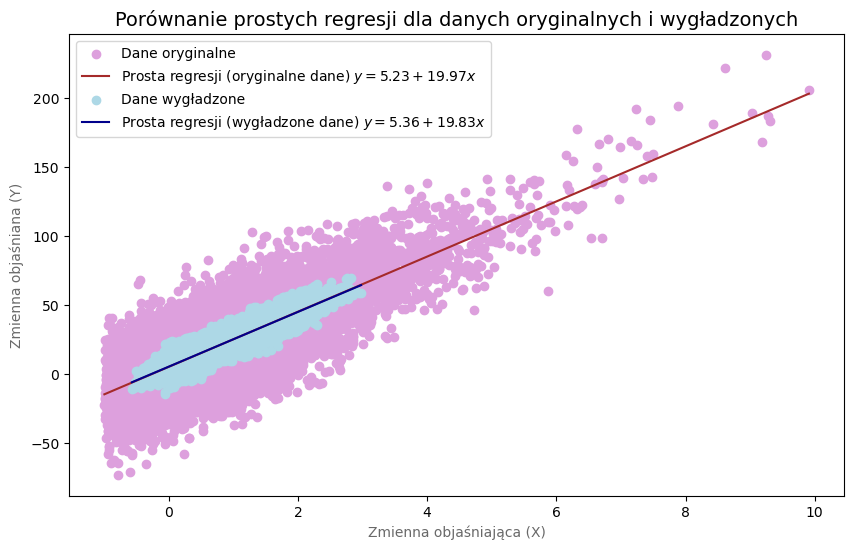

In [238]:
xs = np.linspace(np.min(dane2), np.max(dane2), 1000)
xs2 = np.linspace(np.min(dane2_wygladzone), np.max(dane2_wygladzone), 1000)

plt.figure(figsize=(10, 6))
plt.scatter(dane2, dane3, color="plum", label="Dane oryginalne")
plt.plot(xs, b1 * xs + b0, color="brown", label=fr"Prosta regresji (oryginalne dane) $y = {b0:.2f} + {b1:.2f}x$")
plt.scatter(dane2_wygladzone, dane3_wygladzone, color="lightblue", label="Dane wygładzone")
plt.plot(xs2, b11 * xs2 + b01, color="darkblue", label=fr"Prosta regresji (wygładzone dane) $y = {b01:.2f} + {b11:.2f}x$")
plt.xlabel("Zmienna objaśniająca (X)", fontsize=10, color="dimgray")
plt.ylabel("Zmienna objaśniana (Y)", fontsize=10, color="dimgray")
plt.title("Porównanie prostych regresji dla danych oryginalnych i wygładzonych", fontsize=14)
plt.legend(fontsize=10, loc="upper left")
plt.show()


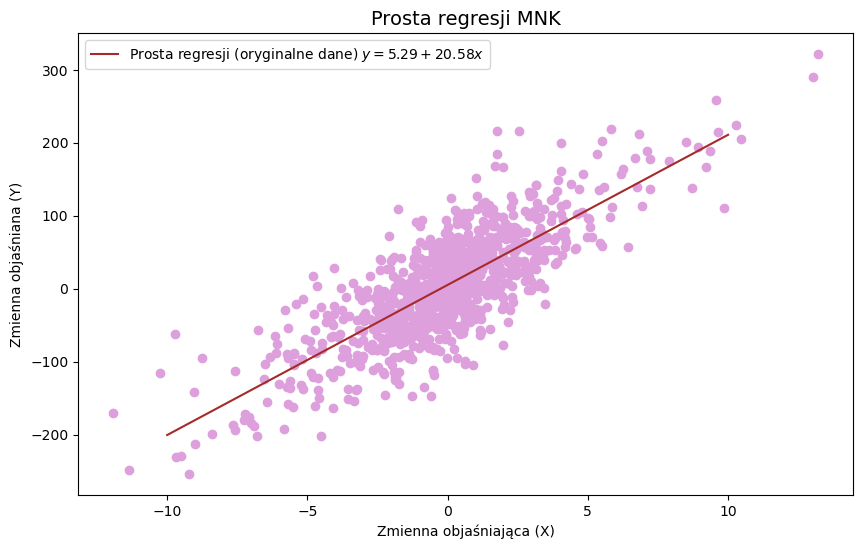

In [240]:
#zad4 

dane4 = pd.read_csv(r"/Users/zuzia/Desktop/dane_4.txt", delim_whitespace=True, header=None)
objasniajaca_4 = dane4[0]
objasniana_4 = dane4[1]

b02, b12 = prosta_regresji(objasniajaca_4, objasniana_4)
xs = np.linspace(-10,10,1000)
y_reg = b12*xs + b02


plt.figure(figsize=(10, 6))
plt.scatter(objasniajaca_4, objasniana_4, color="plum")
plt.plot(xs, y_reg, color="brown", label=fr"Prosta regresji (oryginalne dane) $y = {b02:.2f} + {b12:.2f}x$")
plt.title("Prosta regresji MNK", fontsize=14)
plt.xlabel("Zmienna objaśniająca (X)")
plt.ylabel("Zmienna objaśniana (Y)")
plt.legend(fontsize=10, loc="upper left")
plt.show()

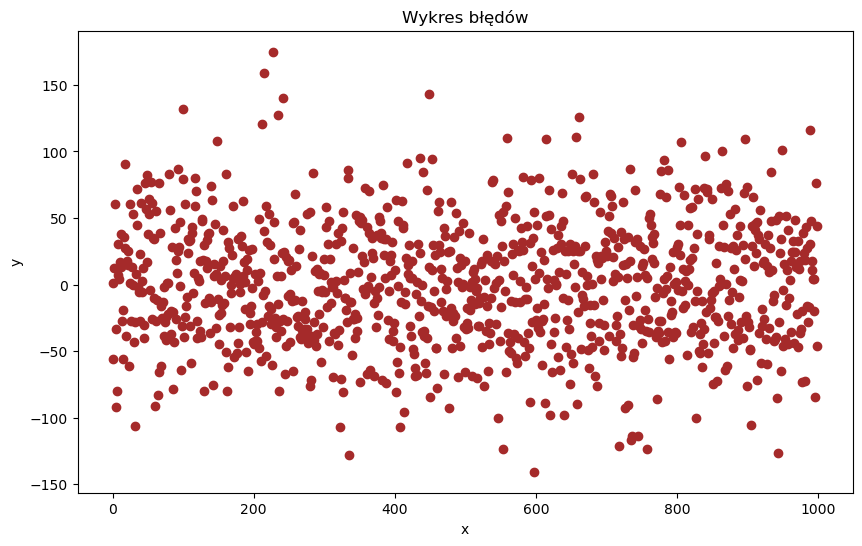

In [241]:
e = objasniana_4 - (b12 * objasniajaca_4 + b02) #wartość resztowa, wartość rzeczywista - wartość przewidywana

indeksy = [i for i in range(len(e))]

plt.figure(figsize=(10, 6))
plt.scatter(indeksy, e, color="brown")
plt.title("Wykres błędów")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [242]:
def wariancja(x):
    return 1/len(x) * np.sum((x - np.mean(x))**2)  #dzielimy sumę kwadratów odchyleń przez liczbę obserwacji N

#standardowy błąd resztowy - miara rozproszenia wszystkich wartości resztowych wokół linii regresji
def SE(x):
    n = len(x)
    return np.sqrt(wariancja(x)) * np.sqrt(1 - (1/n + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2)))

e_zstandaryzowane = e/SE(objasniajaca_4) #standaryzujemy resztę, aby znalezc te obserwacje odstające 

In [243]:
def usuwanie_wartosci_odstających(e,x,y):
    e_std = e / np.std(e) 
    odstajace_x = []
    odstajace_y = []
    x_nowe, y_nowe = [], []
    for i in range(len(e_std)):
        if np.abs(e_std[i]) < 2:
            x_nowe.append(x[i])
            y_nowe.append(y[i])
        else:
            odstajace_x.append(x[i])
            odstajace_y.append(y[i])
    return x_nowe, y_nowe, odstajace_x, odstajace_y

x_no_outliers, y_no_outliers, x_outliers, y_outliers = usuwanie_wartosci_odstających(e, objasniajaca_4, objasniana_4)

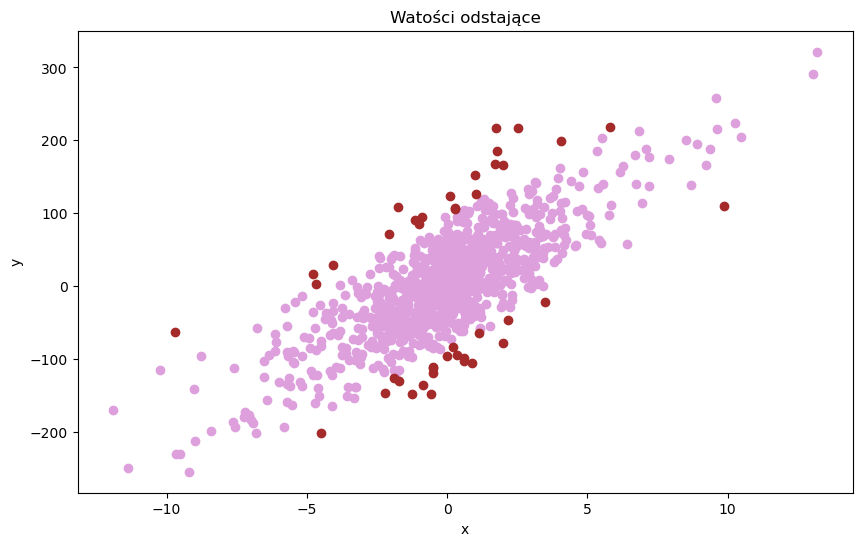

In [244]:
plt.figure(figsize=(10, 6))
plt.scatter(x_no_outliers, y_no_outliers, color="plum")
plt.scatter(x_outliers, y_outliers, color = "brown")
plt.title("Watości odstające")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

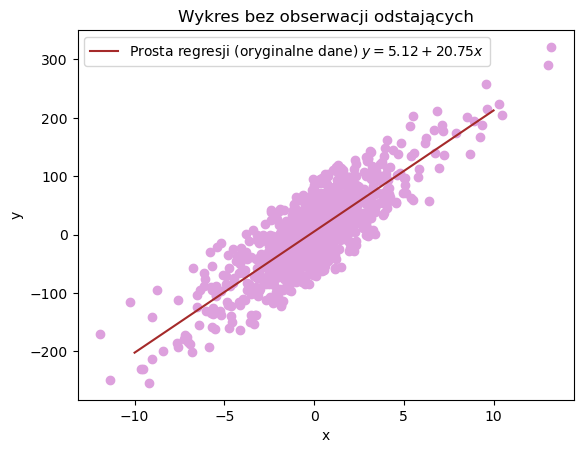

In [245]:
b03, b13 = prosta_regresji(x_no_outliers, y_no_outliers)


plt.scatter(x_no_outliers, y_no_outliers, color="plum")
plt.plot(xs, b13 * xs + b03, color="brown", label=fr"Prosta regresji (oryginalne dane) $y = {b03:.2f} + {b13:.2f}x$")
plt.title("Wykres bez obserwacji odstających")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [268]:
#zad5 

x_990 = objasniajaca_4[:990]
x_991 = objasniajaca_4[990:]
y_990 = objasniana_4[:990]
y_991 = objasniana_4[990:]

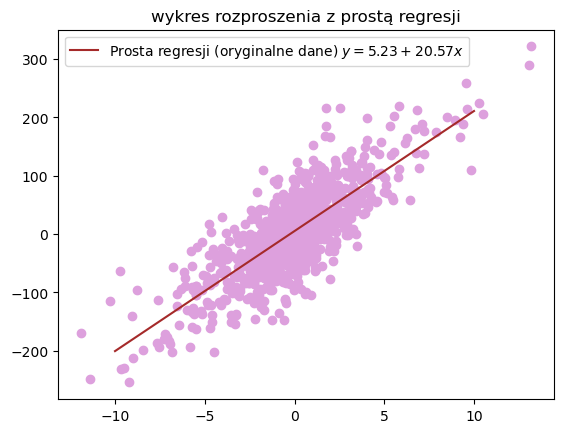

In [269]:
b05, b15 = prosta_regresji(x_990, y_990)

plt.scatter(x_990, y_990, color="plum")
plt.plot(xs, xs*b15+ b05, color="brown", label=fr"Prosta regresji (oryginalne dane) $y = {b05:.2f} + {b15:.2f}x$")
plt.title("wykres rozproszenia z prostą regresji")
plt.legend()
plt.show()

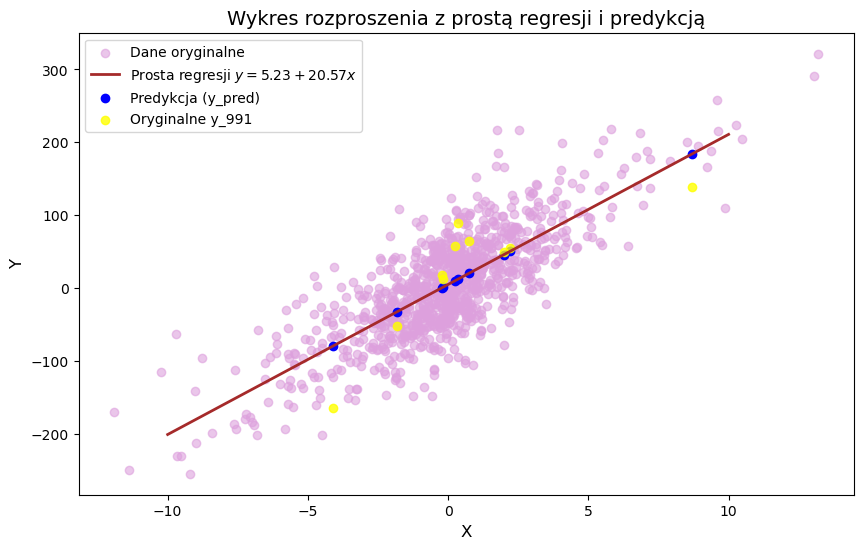

In [272]:

b05, b15 = prosta_regresji(x_990, y_990)
y_pred = b05 + b15 * x_991


plt.figure(figsize=(10, 6))
plt.scatter(x_990, y_990, color="plum", label="Dane oryginalne", alpha=0.6)
plt.plot(xs, xs * b15 + b05, color="brown", label=fr"Prosta regresji $y = {b05:.2f} + {b15:.2f}x$", linewidth=2)
plt.scatter(x_991, y_pred, color="blue", label="Predykcja (y_pred)", marker='o')
plt.scatter(x_991, y_991, color="yellow", label="Oryginalne y_991", alpha=0.8, marker='o')
plt.title("Wykres rozproszenia z prostą regresji i predykcją", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()
plt.show()


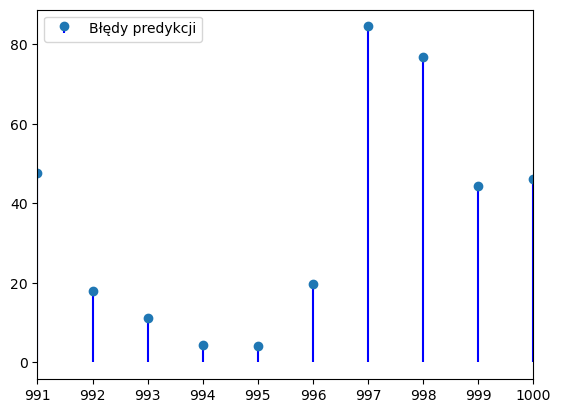

In [265]:
errors = np.abs(y_991 - y_pred)

plt.stem(range(991, 991 + len(errors)), errors, linefmt="blue", markerfmt="o", basefmt=" ", label="Błędy predykcji")
plt.xlim(991, 1000)
plt.legend()
plt.show()


In [274]:
#zad6
dane6 = pd.read_csv(r"/Users/zuzia/Desktop/dane_6.txt", delim_whitespace=True, header=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


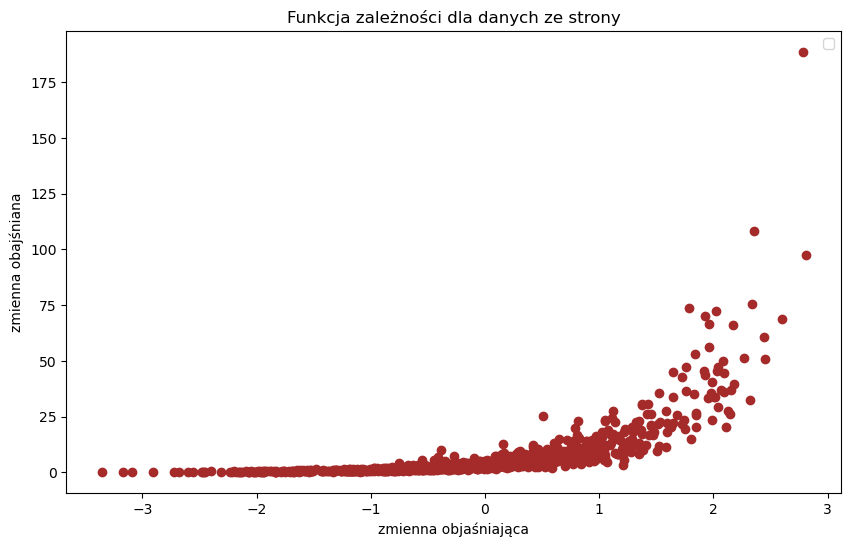

In [284]:
x6 = dane6[0]
y6 = dane6[1]

plt.figure(figsize=(10,6))
plt.scatter(x6, y6, color="brown")
plt.title("Funkcja zależności dla danych ze strony")
plt.xlabel("zmienna objaśniająca")
plt.ylabel("zmienna obajśniana")
plt.legend()
plt.show()



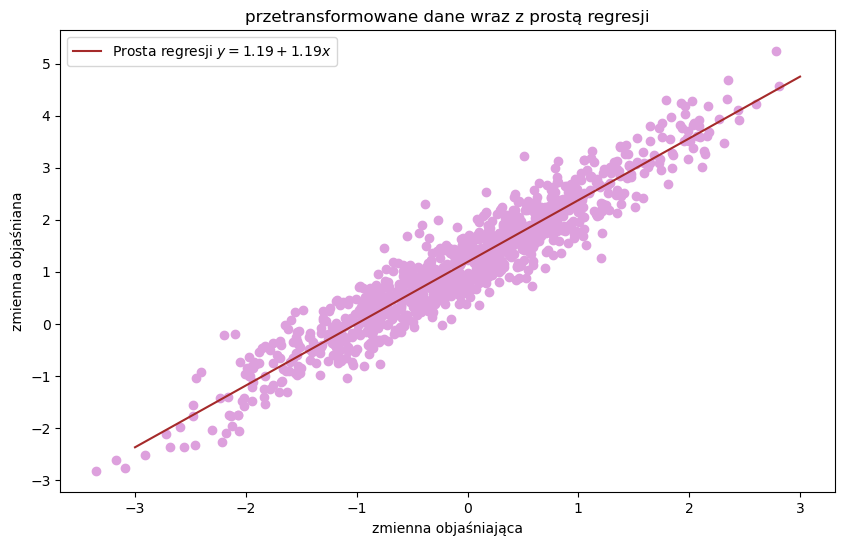

In [287]:
y6_log = np.log(y6)

xs4 = np.linspace(-3,3,1000)
b06, b16 = prosta_regresji(x6, y6_log)

y6_pred_log = b16 * x6 + b06
plt.figure(figsize=(10,6))
plt.title("przetransformowane dane wraz z prostą regresji")
plt.xlabel("zmienna objaśniająca")
plt.ylabel("zmienna objaśniana")
plt.scatter(x6, y6_log, color="plum")
plt.plot(xs4, b16*xs4 + b06, color="brown", label=fr"Prosta regresji $y = {b06:.2f} + {b16:.2f}x$")
plt.legend()
plt.show()

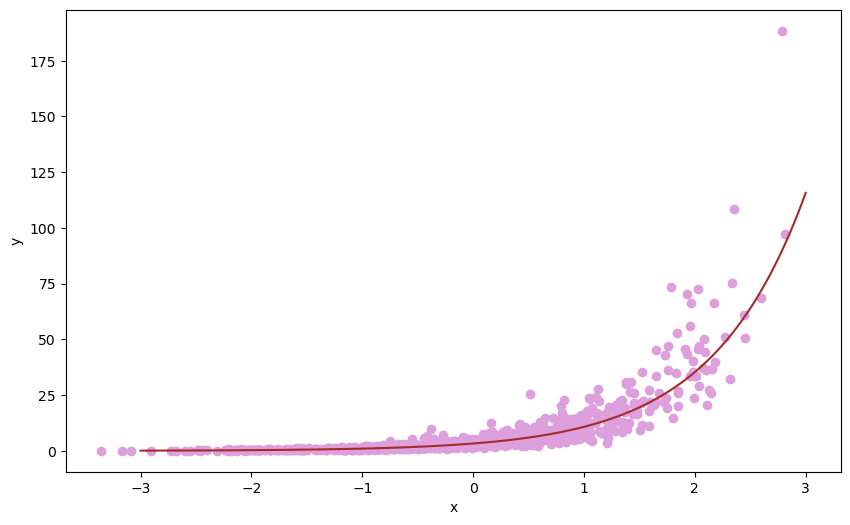

In [290]:
b, a = b16, np.exp(b06)
plt.figure(figsize=(10,6))
plt.scatter(x6, y6, color="plum")
plt.plot(xs4, a*np.exp(b*xs4),color="brown")
plt.xlabel("x")
plt.ylabel("y")
plt.show()